In [1]:
import hdbscan

from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances

In [2]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)

In [3]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.883023,7.446247,-7.944690,-1.456367,-5.333655,8.569393,0.619702,-3.705249,-6.798039,-0.916979
1,4.934668,-6.384033,-0.487668,6.403227,4.806038,-11.082534,-1.174999,11.244222,-8.349688,1.500116
2,-0.009615,7.624167,-7.601475,-4.174886,-6.029445,7.723348,-1.209940,-5.206364,-7.370003,1.270372
3,4.469532,-2.570229,1.923960,6.974986,4.607582,-10.012766,0.146332,9.849906,-8.314740,0.740193
4,3.866707,-3.060597,0.932126,6.671272,5.875735,-10.329224,-0.308309,10.481042,-7.791478,3.101975


In [4]:
# generate a clustering object.

clusterer = hdbscan.HDBSCAN()

In [5]:
# fit the data
clusterer.fit(blobs)

HDBSCAN()

#### We are with done the clustering! 
- But where are the results? 
- How do I get the clusters? 

- The clusterer object knows, and stores the result in an attribute labels_.

In [6]:
# The cluster labels start at 0
#  a total of three clusters, with labels 0, 1, and 2
clusterer.labels_

array([2, 0, 2, ..., 0, 2, 0], dtype=int64)

In [7]:
print(clusterer.labels_.min())
print(clusterer.labels_.max())

0
2


#### HDBSCAN is noise aware – it has a notion of data samples that are not assigned to any cluster. 

This is handled by assigning these samples the label -1

#### hdbscan implements soft clustering
- where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. 
- A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score) while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core). 
- access these scores via the __probabilities___ attribute.

In [8]:
clusterer.probabilities_

array([0.7155996 , 0.58298187, 0.70410671, ..., 0.65519335, 0.60530392,
       0.59895499])

In [9]:
clusterer.probabilities_.shape

(2000,)

#### hdbscan supports a wide variety of metrics,

In [10]:
hdbscan.dist_metrics.METRIC_MAPPING

{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst

In [20]:
# pairwise distance matrix 

In [10]:
distance_matrix = pairwise_distances(blobs)

clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)

clusterer.labels_

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
E:\MYLEARN\2-ANALYTICS-DataScience\datasets\clusterable_data.npy

In [11]:
data = np.load(r'E:\Python\Machine Learning\datasets\clusterable_data.npy')

In [12]:
data.shape

(2309, 2)

In [13]:
data.T

array([[-0.12153499, -0.22093687,  0.1259037 , ...,  0.50243143,
         0.53822256, -0.08688887],
       [-0.22876337, -0.25251088, -0.27314321, ..., -0.3002958 ,
         0.19412199, -0.2092721 ]])

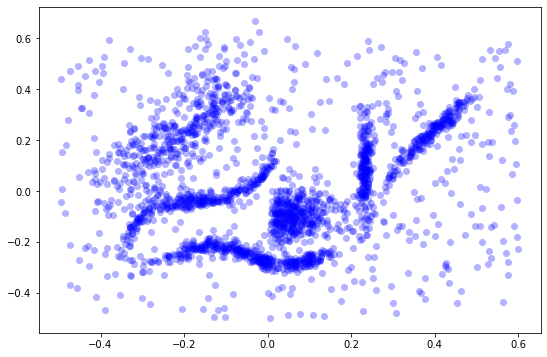

In [14]:
plt.figure(figsize=(9,6))
plt.scatter(*data.T, 
            s=50, 
            linewidth=0, 
            c='b', 
            alpha=0.3)

#### cluster the data as normal 
- visualize the labels with different colors 
- the cluster membership strengths as levels of saturation

In [15]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)


In [16]:
color_palette  = sns.color_palette('deep', 8)


In [17]:
cluster_colors = [color_palette[x] 
                      if x >= 0
                          else (0.5, 0.5, 0.5)
                              for x in clusterer.labels_]


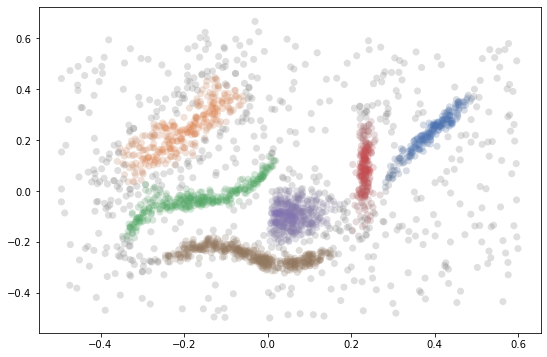

In [18]:
cluster_member_colors = [sns.desaturate(x, p) 
                             for x, p in
                                 zip(cluster_colors, 
                                     clusterer.probabilities_)
                        ]

plt.figure(figsize=(9,6))
plt.scatter(*data.T, 
            s=50, 
            linewidth=0, 
            c=cluster_member_colors, 
            alpha=0.25);


#### Parameter Selection for HDBSCAN